In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn jupyter flask gunicorn

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


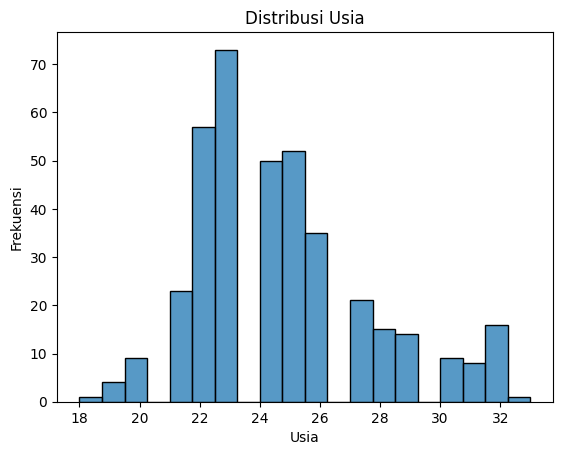

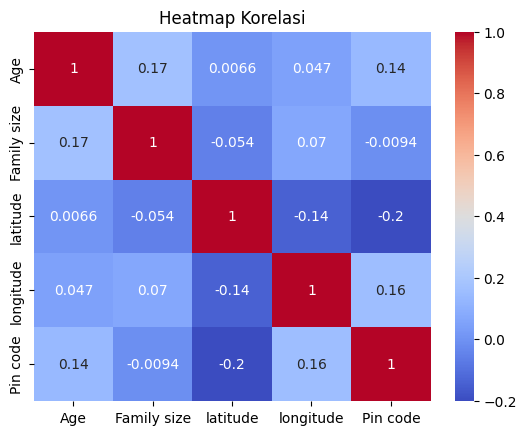

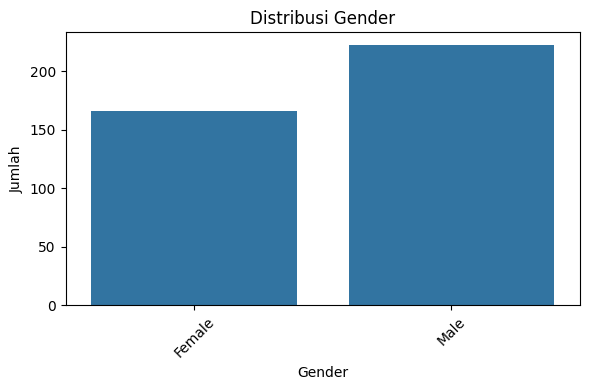

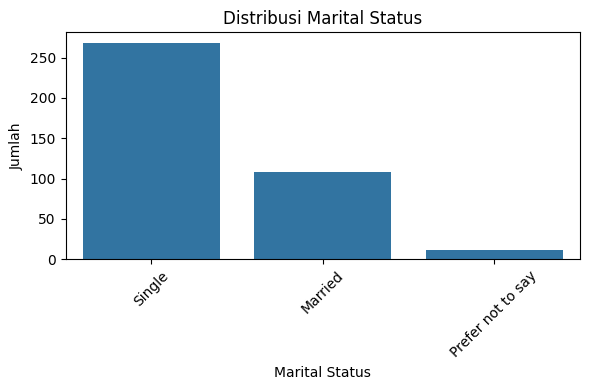

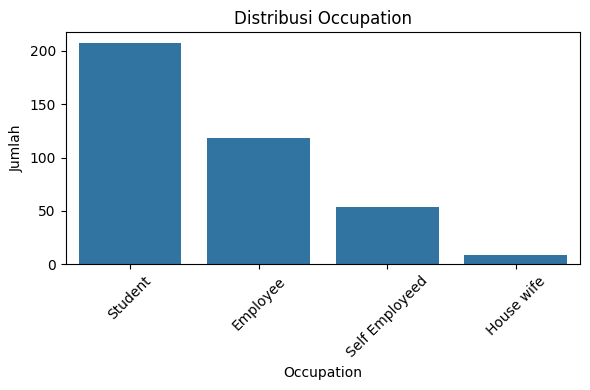

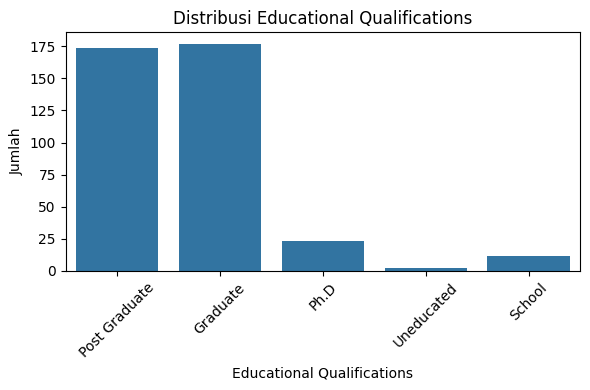

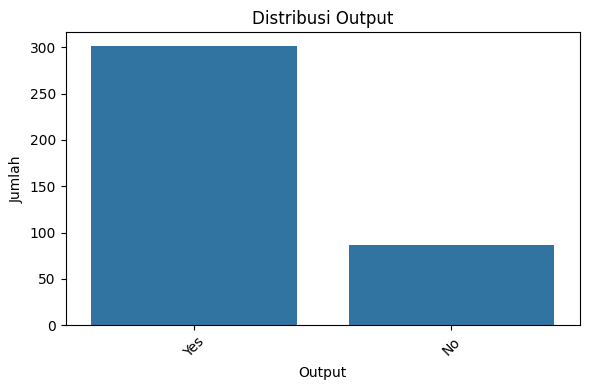

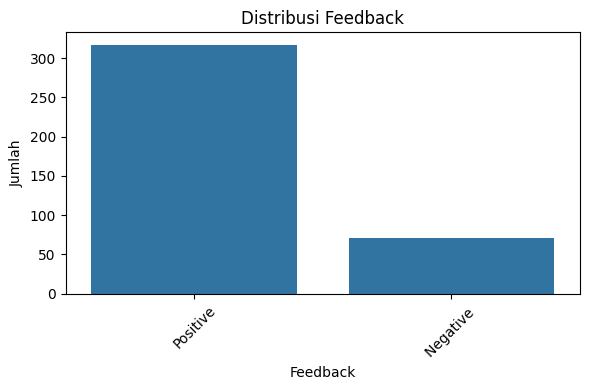

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset baru
df = pd.read_csv("C:\\Users\\HP\\Desktop\\UII_Sem 4\\MPML\\23611109_Laila_UAS\\onlinefoods.csv")

# Info awal
print(df.info())
print(df.describe())

# Histogram dari kolom numerik yang valid
sns.histplot(df['Age'], bins=20)
plt.title("Distribusi Usia")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

# Pilih kolom numerik minimal 2
numeric_cols = df.select_dtypes(include='number')

if numeric_cols.shape[1] >= 2:
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.title("Heatmap Korelasi")
    plt.show()
else:
    print("❌ Tidak cukup kolom numerik untuk membuat heatmap korelasi.")
# Daftar kolom kategorik yang mau divisualisasikan
kategori_cols = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Output', 'Feedback']

# Loop visualisasi
for col in kategori_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.xticks(rotation=45)  # supaya label nggak dempet
    plt.tight_layout()
    plt.show()



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Load data (ganti path sesuai file kamu)
df = pd.read_csv("C:\\Users\\HP\\Desktop\\UII_Sem 4\\MPML\\23611109_Laila_UAS\\onlinefoods.csv")

# Buang kolom yang tidak diperlukan (misal kolom Unnamed hasil dari save Excel)
if 'Unnamed: 12' in df.columns:
    df = df.drop(columns=['Unnamed: 12'])

# Drop missing values (atau bisa juga pakai imputasi nanti)
df = df.dropna()

# Ubah kolom target 'Output' (Yes/No) jadi numerik
label_encoder = LabelEncoder()
df['Output'] = label_encoder.fit_transform(df['Output'])  # Yes = 1, No = 0 (biasanya)

# One-hot encoding untuk semua kolom kategorik (drop_first=True untuk hindari multikolinearitas)
df = pd.get_dummies(df, drop_first=True)

# Pisahkan fitur dan target
X = df.drop('Output', axis=1)
y = df['Output']

# Split data (latih dan uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model yang digunakan
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVM": SVR()
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Latih dan evaluasi tiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }

# Tampilkan hasil evaluasi
print("\nHasil Evaluasi Model:\n")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


Hasil Evaluasi Model:

Linear Regression:
  MAE: 0.2037
  MSE: 0.1102
  RMSE: 0.3320
  R²: 0.1532

Decision Tree:
  MAE: 0.1282
  MSE: 0.1282
  RMSE: 0.3581
  R²: 0.0152

SVM:
  MAE: 0.1777
  MSE: 0.0794
  RMSE: 0.2817
  R²: 0.3903



In [17]:
import pickle

best_model = models["SVM"]  # Ganti dengan model terbaik kamu
pickle.dump(best_model, open('best_model.pkl', 'wb'))

In [19]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))



In [ ]:
best_model = models["SVM"]  # Ganti dengan model terbaik kamu
pickle.dump(best_model, open('best_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

: 